<a href="https://colab.research.google.com/github/jeffersonjpa/DataScienceStudies/blob/master/pandas_studies3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
# df = pd.DataFrame(
# {"a" : [4 ,5, 6],
# "b" : [7, 8, 9],
# "c" : [10, 11, 12]},
# index = [1, 2, 3])
# df

In [0]:
df = pd.DataFrame(
[[4, None, 10],
[5, 8, 11],
[6, 9, None]],
index=[1, 2, 3],
columns=['a', 'b', 'c'])
df

,a,b,c
1,4,NaN,10.0
2,5,8.0,11.0
3,6,9.0,NaN


In [0]:
# Generates descriptive statistics that summarize the central tendency,
#     dispersion and shape of a dataset's distribution, excluding
#     ``NaN`` values.
df.describe()

,a,b,c
count,3.0,2.000000,2.000000
mean,5.0,8.500000,10.500000
std,1.0,0.707107,0.707107
min,4.0,8.000000,10.000000
25%,4.5,8.250000,10.250000
50%,5.0,8.500000,10.500000
75%,5.5,8.750000,10.750000
max,6.0,9.000000,11.000000


In [0]:
# help(pd.Series.describe)

In [0]:
# Handling Missing Data
# Drop rows with any column having NA/null data.
# df.dropna()

df
# Replace all NA/null data with value.
# value = 8.500000
# df.fillna(value)


# df[['a', 'b']] = df[['a','b']].fillna(value=0)
# df[['b']] = df[['b']].fillna(value=8.500000) #Preenche somente a coluna 'b' com a média dos valores

df[['c']] = df[['c']].fillna(value=10.500000) #Preenche somente a coluna 'c' com a média dos valores da coluna 'c'

In [0]:
df

,a,b,c
1,4,8.5,10.0
2,5,8.0,11.0
3,6,9.0,10.5


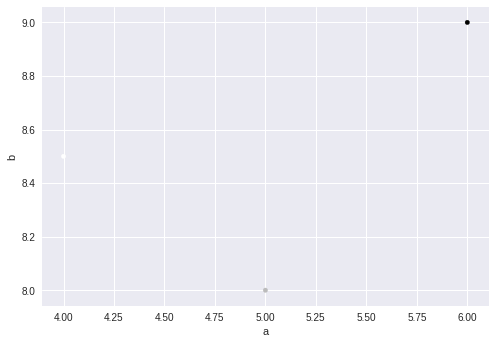

In [0]:
# df.plot.hist()
df.plot.scatter(x='a',y='b')

In [0]:
# Combine Data Sets
adf = pd.DataFrame(
[['A', 3],
['B', 4],
['C', 5]],
# index=['1', '2', '3'],
columns=['X1', 'X2'])
adf

,X1,X2
0,A,3
1,B,4
2,C,5


In [0]:
bdf = pd.DataFrame(
[['A', 'T'],
['B', 'F'],
['D', 'T']],
# index=['1', '2', '3'],
columns=['X1', 'X3'])
bdf

,X1,X3
0,A,T
1,B,F
2,D,T


In [0]:
#Traz toda o dataset (DataFrame) da esquerda (adf) + as linhas compatíveis com a coluna X1 na direita (bdf) quando não houver compatibilidade insere NaN
sabdc = pd.merge(adf, bdf, how='left', on='X1')
sabdc

,X1,X2,X3
0,A,3,T
1,B,4,F
2,C,5,NaN


In [0]:
pd.merge(adf, bdf, how='right', on='X1')
pd.merge(adf, bdf, how='inner', on='X1')
pd.merge(adf, bdf, how='outer', on='X1')

,X1,X2,X3
0,A,3.0,T
1,B,4.0,F
2,C,5.0,NaN
3,D,NaN,T


In [0]:
# Drop columns from DataFrame
# df.drop(columns=['Length','Height'])


sabdc.dropna(how='any')
# sabdc
# sabdc.describe()


,X1,X2,X3
0,A,3,T
1,B,4,F


In [0]:
# Dummy encoding
df = pd.DataFrame({'key': list('bbacab'), 'data1': range(6)})
df

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [0]:
# pd.get_dummies(df['key'])
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [0]:
#Dummie encongin com prefixo key
dummies = pd.get_dummies(df['key'], prefix='key')
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [0]:
df[['data1']].join(dummies)

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [0]:
#
values = np.random.randn(10)
values

array([ 1.56080525,  0.33002498, -0.80094246,  0.11463806,  2.52599327,
       -0.74894817,  0.91141507, -1.22449101, -0.30735249,  0.82852754])

In [0]:
#  Fatorização factorize()
 x = pd.Series(['A', 'A', np.nan, 'B', 3.14, np.inf])
 x

0       A
1       A
2     NaN
3       B
4    3.14
5     inf
dtype: object

In [0]:
# labels, uniques = pd.factorize(x)
labels, uniques = pd.factorize(x)
labels
# uniques


array([ 0,  0, -1,  1,  2,  3])

In [0]:
 help(pd.Series.factorize)

Help on function factorize in module pandas.core.base:

factorize(self, sort=False, na_sentinel=-1)
    Encode the object as an enumerated type or categorical variable
    
    Parameters
    ----------
    sort : boolean, default False
        Sort by values
    na_sentinel: int, default -1
        Value to mark "not found"
    
    Returns
    -------
    labels : the indexer to the original array
    uniques : the unique Index



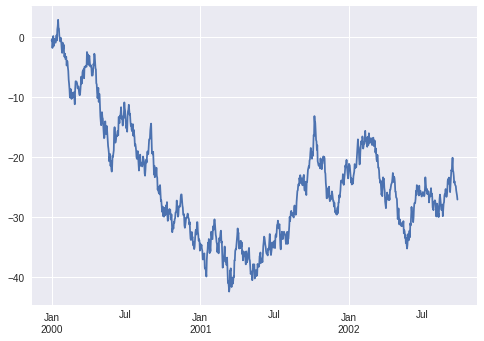

In [0]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum() #Return cumulative sum over requested axis.
ts.plot()

In [0]:
# help(pd.Series.cumsum)

Help on function cumsum in module pandas.core.series:

cumsum(self, axis=None, skipna=True, *args, **kwargs)
    Return cumulative sum over requested axis.
    
    Parameters
    ----------
    axis : {index (0)}
    skipna : boolean, default True
        Exclude NA/null values. If an entire row/column is NA, the result
        will be NA
    
    Returns
    -------
    cumsum : scalar
    
    
    
    See also
    --------
    pandas.core.window.Expanding.sum : Similar functionality
        but ignores ``NaN`` values.



In [0]:
#Replace
d = {'a': list(range(4)), 'b': list('ab..'), 'c': ['a', 'b', np.nan, 'd']}
# df = pd.DataFrame(d)
df = pd.DataFrame(d)
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [0]:
df.replace('.', np.nan) #replace . onde encontrar no dataset por NaN

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [0]:
# df.sample(2)
help(pd.Series.sample)

Help on function sample in module pandas.core.generic:

sample(self, n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)
    Returns a random sample of items from an axis of object.
    
    Parameters
    ----------
    n : int, optional
        Number of items from axis to return. Cannot be used with `frac`.
        Default = 1 if `frac` = None.
    frac : float, optional
        Fraction of axis items to return. Cannot be used with `n`.
    replace : boolean, optional
        Sample with or without replacement. Default = False.
    weights : str or ndarray-like, optional
        Default 'None' results in equal probability weighting.
        If passed a Series, will align with target object on index. Index
        values in weights not found in sampled object will be ignored and
        index values in sampled object not in weights will be assigned
        weights of zero.
        If called on a DataFrame, will accept the name of a column
        when axis =

In [0]:
# numpy
# help(np.random.randn)
df = pd.DataFrame(np.random.randn(50, 4), columns=list('ABCD'))
df.head()

,A,B,C,D
0,0.032353,-1.070593,0.945246,-0.462425
1,-1.087732,0.456776,-0.549742,1.700915
2,-0.836414,1.322387,0.550990,-1.376769
3,0.092436,-0.853956,1.264190,0.045295
4,-1.598927,1.372231,0.056886,0.139024


In [0]:
df.describe()

,A,B,C,D
count,50.000000,50.000000,50.000000,50.000000
mean,-0.039625,-0.028450,-0.135086,-0.159174
std,0.996498,0.931088,0.915065,0.983375
min,-1.839678,-2.057774,-2.034002,-2.607403
25%,-0.782463,-0.835146,-0.654456,-0.736780
50%,0.010749,0.090629,-0.032652,-0.060915
75%,0.395434,0.711262,0.392269,0.429088
max,2.544578,1.630247,1.791564,2.923573


In [0]:
df.mean(0)

A   -0.039625
B   -0.028450
C   -0.135086
D   -0.159174
dtype: float64

In [0]:
df.sample(10)

,A,B,C,D
17,-1.644783,-0.233935,1.545229,0.711808
4,-1.598927,1.372231,0.056886,0.139024
32,0.106973,1.172178,0.314178,-0.740213
29,-1.835320,0.165323,-0.121961,-0.047642
6,0.080510,-0.628742,-0.337987,1.017588
34,-0.188707,1.630247,-0.019873,-1.439545
2,-0.836414,1.322387,0.550990,-1.376769
16,2.544578,1.271150,0.117790,0.025582
9,0.774282,0.719040,-0.383594,-0.033178
35,0.053282,1.513208,-1.258204,-0.382111


In [0]:
df.loc[df.A == 0.080510, 'A']

Series([], Name: A, dtype: float64)

In [0]:
# data = df

# data[0:5] #Somente as linhas 0 a 5 (5 não inclusa), ou seja, somente 5 linhas
# data[0:1] #Somente as linhas 1 a 3 (3 não incluso) com todas as colunas
# data.loc[[0],] #Extrai a linha 0 de todas as colunas uma vez que a coluna não está informada.
# data.loc[[0],['A', 'B']] #Somente a célular linha 0 com coluna 'Country Name'
# data.loc[:,'A'] #Todos as linhas da coluna Country Name
# data.loc[1] #Todas as informações de uma linha como se fosse uma célula
# data.loc[0:3,['Country Name']] #Somente as linhas 0 a 3 com a coluna 'Country Name'

# data.loc[0:3,['Country Name','Indicator Name']] #Somente as linhas 0 a 3 com as colunas 'Country Name' and 'Indicator Name'

# data.iloc[[1],[1]]

# Criando uma nova coluna 
# data.newcol = np.random.randn(50)
# df['E'] = data.newcol

# axis : int or axis name Whether to drop labels from the index (0 / 'index') or columns (1 / 'columns').
df = df.drop(['newcol'], axis=1) 

# help(df.Series.drop)
# help(pd.Series.drop)


In [0]:
df

,A,B,C,D,E
0,0.032353,-1.070593,0.945246,-0.462425,-1.183282
1,-1.087732,0.456776,-0.549742,1.700915,-0.200272
2,-0.836414,1.322387,0.550990,-1.376769,-0.641720
3,0.092436,-0.853956,1.264190,0.045295,-2.044784
4,-1.598927,1.372231,0.056886,0.139024,-0.390342
5,1.447416,0.449010,-1.288414,-1.512913,0.836691
6,0.080510,-0.628742,-0.337987,1.017588,-0.620423
7,0.755417,0.091625,-1.237861,0.201496,0.886656
8,-0.620610,-1.039439,0.107981,0.956828,-1.098106
9,0.774282,0.719040,-0.383594,-0.033178,-1.167583


In [0]:
df.info()
# df.insert(np.random.randn(np.nan))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
A    50 non-null float64
B    50 non-null float64
C    50 non-null float64
D    50 non-null float64
E    50 non-null float64
dtypes: float64(5)
memory usage: 2.0 KB


In [0]:
# df[['0','1','2']]
# df.index
df.iloc[0:5,:]

,A,B,C,D,E
0,0.032353,-1.070593,0.945246,-0.462425,-1.183282
1,-1.087732,0.456776,-0.549742,1.700915,-0.200272
2,-0.836414,1.322387,0.550990,-1.376769,-0.641720
3,0.092436,-0.853956,1.264190,0.045295,-2.044784
4,-1.598927,1.372231,0.056886,0.139024,-0.390342


In [0]:
# df.iloc[:5,:] # the first 5 rows, and all of the columns for those rows.
# df.iloc[:,:] # the entire DataFrame.
# df.iloc[5:,5:] # rows from position 5 onwards, and columns from position 5 onwards.
# df.iloc[:,0] # the first column, and all of the rows for the column.
df.iloc[9,:] #the 10th row, and all of the columns for that row.

A    0.774282
B    0.719040
C   -0.383594
D   -0.033178
E   -1.167583
Name: 9, dtype: float64

In [0]:
df.corr()

,A,B,C,D,E
A,1.000000,-0.055248,-0.135086,-0.118542,0.177421
B,-0.055248,1.000000,-0.081130,-0.037653,-0.171634
C,-0.135086,-0.081130,1.000000,-0.052803,-0.103737
D,-0.118542,-0.037653,-0.052803,1.000000,-0.170425
E,0.177421,-0.171634,-0.103737,-0.170425,1.000000


In [0]:
# https://www.dataquest.io/blog/pandas-python-tutorial/
# https://s3.amazonaws.com/dq-blog-files/pandas-cheat-sheet.pdf
# https://www.dataquest.io/blog/pandas-cheat-sheet/
# https://s3.amazonaws.com/dq-blog-files/numpy-cheat-sheet.pdf